## Understanding different color spaces

This notebook is to express my understanding/experiment about `color spaces` in computer vision.

**A color space is nothing but a definite organization of colors**

Different organization of `colors` carry different imformations. It's like different features about an image are encoded in different `color space`. 

> Amateur computer vision enthusiast's usaully donot take into consideration the effect of different lightening conditions while doing color segmentation.  

Color based segmentation is applied for skin tone detection, traffic light recognition etc. Thus choosing relevant color space before applying various image processing magics is important and crucial. You can be bound by lack of information presented by one color space. 

For all the analysis following dependencies will be used:

- openCV
- numpy

### Imports

In [1]:
import cv2
import matplotlib.pyplot as plt

# plt.style.use('seaborn-whitegrid')

%matplotlib inline

### Loading images

In [2]:
outdoor = cv2.imread('images/cube_outdoor.jpeg')
indoor = cv2.imread('images/cube_indoor.jpeg')

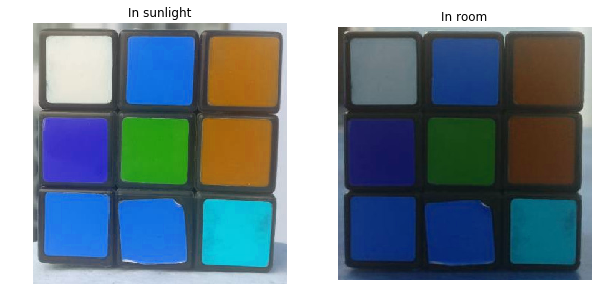

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

axes[0].imshow(outdoor)
axes[0].axis('off')
axes[0].grid(None)
axes[0].set_title('In sunlight');
axes[1].imshow(indoor)
axes[1].axis('off')
axes[1].grid(None)
axes[1].set_title('In room');

> **NOTE**: `cv2.imread()` read image in default color space of `BGR` while matplotlib's `plt.imshow()` uses `RGB` color space. That's why the image seem inappropriate. OpenCV is a library stuck with `BGR` convention. -_-. <br>
> - cv2 is just reading image in a different order than what is being to to display. For non-interactive python environments converting to `RGB` is not required. As no computation is taking place just the order is changed from `BGR -> RBG`.

In [4]:
outdoor = cv2.cvtColor(outdoor, cv2.COLOR_BGR2RGB)
indoor = cv2.cvtColor(indoor, cv2.COLOR_BGR2RGB)

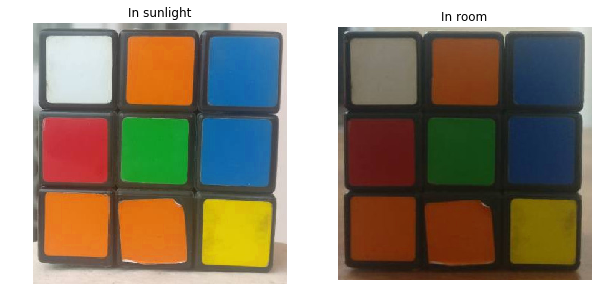

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

axes[0].imshow(outdoor)
axes[0].axis('off')
axes[0].grid(None)
axes[0].set_title('In sunlight');
axes[1].imshow(indoor)
axes[1].axis('off')
axes[1].grid(None)
axes[1].set_title('In room');

> To display images in non interactive python environment use `cv2.imshow('frame name', image)` <br>
> By default it is loaded in `BGR` color space. <br>
> By using `cv2.cvtColor()` we can change color space of any image. <br>

### Different color space

#### RGB

- It is an additive color space based on RGB color model.
- RGB color model is an additive color model where all the colors are produced only three primary colors. This is done by mixing them in different proportions. 
- The three channels(red, green and blue) are correlated by the amount of light hitting the surface.

In [6]:
R, G, B = cv2.split(outdoor)
R_, G_, B_ = cv2.split(indoor)

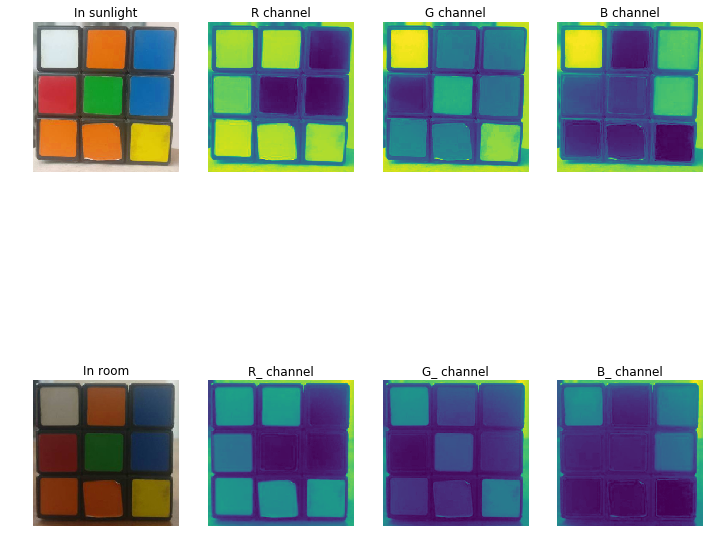

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,12))

axes[0][0].imshow(outdoor); axes[0][0].axis('off'); axes[0][0].grid(None); axes[0][0].set_title('In sunlight');
axes[0][1].imshow(R); axes[0][1].axis('off'); axes[0][1].grid(None); axes[0][1].set_title('R channel');
axes[0][2].imshow(G); axes[0][2].axis('off'); axes[0][2].grid(None); axes[0][2].set_title('G channel');
axes[0][3].imshow(B); axes[0][3].axis('off'); axes[0][3].grid(None); axes[0][3].set_title('B channel');

axes[1][0].imshow(indoor); axes[1][0].axis('off'); axes[1][0].grid(None); axes[1][0].set_title('In room');
axes[1][1].imshow(R_); axes[1][1].axis('off'); axes[1][1].grid(None); axes[1][1].set_title('R_ channel');
axes[1][2].imshow(G_); axes[1][2].axis('off'); axes[1][2].grid(None); axes[1][2].set_title('G_ channel');
axes[1][3].imshow(B_); axes[1][3].axis('off'); axes[1][3].grid(None); axes[1][3].set_title('B_ channel');

> This do not look appropriate. The channels have a greenish tint. It's not that the `cv2.split()` is adding some information. It's simply returning three vectors in case of `RGB` splitting. The issue is diplaying using `plt.imshow()` which by default applies a standard colormap, `viridis afaik`, which in fact is greenish. This is appropriate for data arrays which are supposed to be displayed as a heatmap, but not for pictures. On the other hand, a 3D array, i.e. an array with RGB values is automatically interpreted as an image by `imshow()`.

##### What does `R`, `G`, `B` look like?

<table>
    <tr>
        <th align="center">Image</th>
        <th align="center">R Channel</th>
        <th align="center">G Channel</th>
        <th align="center">B Channel</th>
    </tr>
    <tr>
        <td><img src='images/cube_outdoor.jpeg'></td>
        <td><img src='images/R.jpeg'></td>
        <td><img src='images/G.jpeg'></td>
        <td><img src='images/B.jpeg'></td>
    </tr>
    <tr>
        <td><img src='cube_indoor.jpeg'></td>
        <td><img src='images/R_.jpeg'></td>
        <td><img src='images/G_.jpeg'></td>
        <td><img src='images/B_.jpeg'></td>
    </tr>
</table>

##### Insights
Look at the `B channel` in both the case. In the outdoor image's B channel there is a visible difference `white and blue` shade. Whereas in case of indoor image the difference is not much.

- significant perceptual non-uniformity.
- mixing of chrominance ( Color related information ) and luminance ( Intensity related information ) data.

#### HSV

Unlike `RGB` which is described using three primary colors. `HSV` is actually based on how humans perceive colors.

It is a cylindrical representation of RGB color model.

- H: Hue is the angle. This is the dominant color as perceived by humans. 0 deg corresponds to red, 120 deg corresponds to green and 240 deg to blue colors. Hue of a color shows to which pure color it belongs.  All tints, tones and shades of red have the same hue. 
- S: Saturation is the radius. Is is the grayscale value of the color. Or the amount of whiteness associated with the Hue. A pure red is fully saturated, with a saturation of 1; tints of red have saturations less than 1; and white has a saturation of 0.
- V: Value is the height. It is also called its lightness, describes how dark the color is. A value of 0 is black, with increasing lightness moving away from black. 

In [8]:
outdoorHSV = cv2.cvtColor(outdoor, cv2.COLOR_BGR2HSV)
indoorHSV = cv2.cvtColor(indoor, cv2.COLOR_BGR2HSV)

##### What does `H`, `S`, `V` look like?

<table>
    <tr>
        <th align="center">Image</th>
        <th align="center">Hue</th>
        <th align="center">Saturation</th>
        <th align="center">Value</th>
    </tr>
    <tr>
        <td><img src='cube_outdoor.jpeg'></td>
        <td><img src='images/H.jpeg'></td>
        <td><img src='images/S.jpeg'></td>
        <td><img src='images/V.jpeg'></td>
    </tr>
    <tr>
        <td><img src='cube_indoor.jpeg'></td>
        <td><img src='images/H_.jpeg'></td>
        <td><img src='images/S_.jpeg'></td>
        <td><img src='images/V_.jpeg'></td>
    </tr>
</table>

- The H Component is similar in both the images which indicates the color information is intact even under illumination changes.
- The S component is also very similar in both images.
- The V Component captures the amount of light falling on it thus it changes due to illumination changes.
- There is drastic difference between the values of the red piece of outdoor and Indoor image. This is because Hue is represented as a angle and red is at the starting angle.

### LAB

The LAB color model is 3-axis color model. It's absolute. It's device independent. Thus all device use this color model only.

- L: Lightness(Intensity. 0 corresponds to black and 1 corresponds to white and all the values between them are different grays. Encodes brightness.
- A: Color component ranging from green to magenta. With -100 as green and 100 as magenta. 0 is neutral. Encodes color.
- B: Color component ranging from Blue to Yellow. With -100 as blue and 100 as yellow. 0 is neutral. Encodes color. 


It is different than `RGB` color model even though `RGB` color model is also 3-axis representation. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

In [11]:
outdoorLAB = cv2.cvtColor(outdoor, cv2.COLOR_BGR2LAB)
indoorLAB = cv2.cvtColor(indoor, cv2.COLOR_BGR2LAB)

<table>
    <tr>
        <th align="center">Image</th>
        <th align="center">Lightness</th>
        <th align="center">A colors</th>
        <th align="center">B colors</th>
    </tr>
    <tr>
        <td><img src='cube_outdoor.jpeg'></td>
        <td><img src='images/L.jpeg'></td>
        <td><img src='images/A.jpeg'></td>
        <td><img src='images/B.jpeg'></td>
    </tr>
    <tr>
        <td><img src='cube_indoor.jpeg'></td>
        <td><img src='images/L_.jpeg'></td>
        <td><img src='images/A_.jpeg'></td>
        <td><img src='images/B_.jpeg'></td>
    </tr>
</table>

- It is pretty clear from the figure that the change in illumination has mostly affected the L component.
- The A and B components which contain the color information did not undergo massive changes.
- The respective values of Green, Orange and Red ( which are the extremes of the A Component ) has not changed in the B Component and similarly the respective values of Blue and Yellow ( which are the extremes of the B Component ) has not changed in the A component.